/var/folders/jf/y0wbv8vx20qdvzf39n4w_w2m0000gn/T/ipykernel_76018/3880225759.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],fontsize=12, rotation=-30);


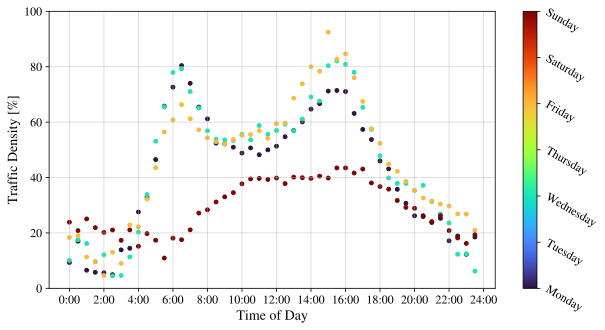

In [13]:
%reset -f
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#
# Settings
pd.options.mode.chained_assignment = None; 
%config InlineBackend.figure_format = 'svg'; mpl.rc('figure', dpi=300); 
plt.rcParams.update({'font.family':'STIXGeneral','mathtext.fontset':'stix'}); 
#
# Read in the data
traffic_data = pd.read_csv('dump/TrafficData_Resampled.csv'); traffic_data['timestamp'] = pd.to_datetime(traffic_data['timestamp']); 
#
traffic_data['yday'] = traffic_data['timestamp'].dt.dayofyear; traffic_data['wday'] = traffic_data['timestamp'].dt.dayofweek; traffic_data['dmin'] = traffic_data['timestamp'].dt.hour*60 + traffic_data['timestamp'].dt.minute; traffic_data['hmin'] = traffic_data['dmin']/60; 
traffic_data = traffic_data[['timestamp','yday','wday','hmin','dmin','dt_0-1','dt_0-6','dt_1-0','dt_1-2','dt_2-1','dt_2-3','dt_3-2','dt_3-4','dt_3-6','dt_4-3','dt_4-5','dt_5-4','dt_5-6','dt_6-0','dt_6-3','dt_6-5']]; 
traffic_data = traffic_data.sort_values(['yday','wday','dmin']).reset_index(drop=True); 
#
scaler = MinMaxScaler(); 
point_0 = traffic_data[['timestamp','dt_0-1','dt_0-6','dt_1-0','dt_6-0']].set_index('timestamp'); 
point_0[['dt_0-1','dt_0-6','dt_1-0','dt_6-0']] = scaler.fit_transform(point_0[['dt_0-1','dt_0-6','dt_1-0','dt_6-0']]); 
point_0['point_0'] = point_0[['dt_0-1','dt_0-6','dt_1-0','dt_6-0']].mean(axis=1);
#
point_1 = traffic_data[['timestamp','dt_0-1','dt_1-0','dt_1-2','dt_2-1']].set_index('timestamp'); 
point_1[['dt_0-1','dt_1-0','dt_1-2','dt_2-1']] = scaler.fit_transform(point_1[['dt_0-1','dt_1-0','dt_1-2','dt_2-1']]); 
point_1['point_1'] = point_1[['dt_0-1','dt_1-0','dt_1-2','dt_2-1']].mean(axis=1);
#
point_2 = traffic_data[['timestamp','dt_1-2','dt_2-1','dt_2-3','dt_3-2']].set_index('timestamp'); 
point_2[['dt_1-2','dt_2-1','dt_2-3','dt_3-2']] = scaler.fit_transform(point_2[['dt_1-2','dt_2-1','dt_2-3','dt_3-2']]); 
point_2['point_2'] = point_2[['dt_1-2','dt_2-1','dt_2-3','dt_3-2']].mean(axis=1);
#
point_3 = traffic_data[['timestamp','dt_2-3','dt_3-2','dt_3-4','dt_3-6','dt_4-3','dt_6-3']].set_index('timestamp'); 
point_3[['dt_2-3','dt_3-2','dt_3-4','dt_3-6','dt_4-3','dt_6-3']] = scaler.fit_transform(point_3[['dt_2-3','dt_3-2','dt_3-4','dt_3-6','dt_4-3','dt_6-3']]); 
point_3['point_3'] = point_3[['dt_2-3','dt_3-2','dt_3-4','dt_3-6','dt_4-3','dt_6-3']].mean(axis=1);
#
point_4 = traffic_data[['timestamp','dt_3-4','dt_4-3','dt_4-5','dt_5-4']].set_index('timestamp'); 
point_4[['dt_3-4','dt_4-3','dt_4-5','dt_5-4']] = scaler.fit_transform(point_4[['dt_3-4','dt_4-3','dt_4-5','dt_5-4']]); 
point_4['point_4'] = point_4[['dt_3-4','dt_4-3','dt_4-5','dt_5-4']].mean(axis=1);
#
point_5 = traffic_data[['timestamp','dt_4-5','dt_5-4','dt_5-6','dt_6-5']].set_index('timestamp'); 
point_5[['dt_4-5','dt_5-4','dt_5-6','dt_6-5']] = scaler.fit_transform(point_5[['dt_4-5','dt_5-4','dt_5-6','dt_6-5']]); 
point_5['point_5'] = point_5[['dt_4-5','dt_5-4','dt_5-6','dt_6-5']].mean(axis=1);
#
point_6 = traffic_data[['timestamp','dt_0-6','dt_3-6','dt_5-6','dt_6-0','dt_6-3','dt_6-5']].set_index('timestamp'); 
point_6[['dt_0-6','dt_3-6','dt_5-6','dt_6-0','dt_6-3','dt_6-5']] = scaler.fit_transform(point_6[['dt_0-6','dt_3-6','dt_5-6','dt_6-0','dt_6-3','dt_6-5']]); 
point_6['point_6'] = point_6[['dt_0-6','dt_3-6','dt_5-6','dt_6-0','dt_6-3','dt_6-5']].mean(axis=1);
#
traffic_data_avg = pd.concat([point_0['point_0'],point_1['point_1'],point_2['point_2'],point_3['point_3'],point_4['point_4'],point_5['point_5'],point_6['point_6']],axis=1);
traffic_data_avg.reset_index(inplace=True); 
traffic_data_avg.to_csv('per_sensor/traffic_data_avg.csv',index=False);
#
sensor_3 = traffic_data[['yday','wday','hmin','dmin','dt_3-4','dt_4-3','dt_4-5','dt_5-4']]; 
scaler = MinMaxScaler(); 
sensor_3['dt_3-4'] = scaler.fit_transform(sensor_3['dt_3-4'].values.reshape(-1,1))


# sensor_5 = traffic_data[['yday','wday','hmin','dmin','dt_4-5','dt_5-4','dt_5-6','dt_6-5']]; 
#
# pca = PCA(); 
# pca.fit_transform(sensor_3); 
# y1 = np.cumsum(pca.explained_variance_ratio_)*100; 
# x1 = np.arange(1,len(y1)+1); 
# plt.bar(x1,y1); plt.plot(x1[4:],y1[4:], color = 'C1'); 
# plt.grid(True); 
# print(y1)
# #
p0 = sensor_3.loc[sensor_3['wday']==0,['wday','hmin','dt_3-4']].sort_values('hmin').groupby('hmin').mean().reset_index(); 
p2 = sensor_3.loc[sensor_3['wday']==2,['wday','hmin','dt_3-4']].sort_values('hmin').groupby('hmin').mean().reset_index(); 
p4 = sensor_3.loc[sensor_3['wday']==4,['wday','hmin','dt_3-4']].sort_values('hmin').groupby('hmin').mean().reset_index(); 
p6 = sensor_3.loc[sensor_3['wday']==6,['wday','hmin','dt_3-4']].sort_values('hmin').groupby('hmin').mean().reset_index(); 
#
p = pd.concat([p0,p2,p4,p6],axis=0).reset_index(drop=True);
# p['dt_3-4'] = MinMaxScaler().fit_transform(p['dt_3-4'].values.reshape(-1,1));
# #
plt.figure(figsize=(10,5)); 
plt.grid(True, alpha=0.5, zorder=0); plt.ylim(0,100);


#
plt.scatter(p['hmin'],p['dt_3-4']*100,c=p['wday'],cmap='turbo',s=15,zorder=1)


cbar = plt.colorbar();
cbar.ax.set_yticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],fontsize=12, rotation=-30); 
plt.xticks(np.arange(0,25,2),['%s:00' %i for i in np.arange(0,25,2)],fontsize=12); plt.yticks(fontsize=12); 
plt.xlabel('Time of Day',fontsize=14); plt.ylabel('Traffic Density [%]',fontsize=14); 
# #